Linear Regression MSE: 0.037113794407976894
Logistic Regression Accuracy: 1.0
Decision Tree Regressor MSE: 0.0
Decision Tree Classifier Accuracy: 1.0
Random Forest Accuracy: 1.0
Naive Bayes Accuracy: 1.0
SVC Accuracy: 1.0
XGBoost Accuracy: 1.0


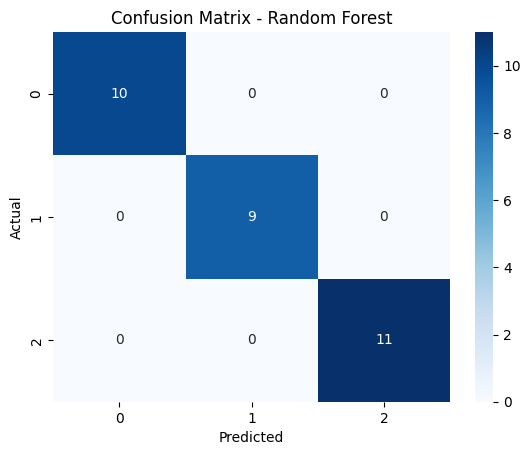

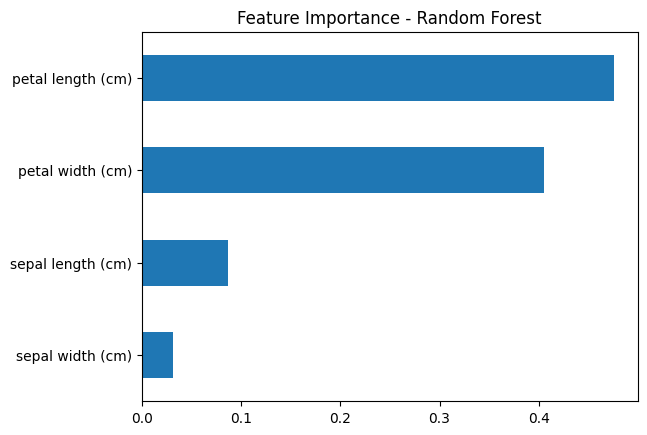

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

# Load dataset (Iris dataset for classification, modify if needed)
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split dataset
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Simple & Multiple Linear Regression (Using a regression dataset would be better)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

# 2. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# 3. Decision Tree Regressor (For regression tasks)
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)
print("Decision Tree Regressor MSE:", mean_squared_error(y_test, y_pred_dt_reg))

# 4. Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt_clf = dt_clf.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt_clf))

# 5. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 6. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# 7. Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

# 8. XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=data.feature_names)
importances.sort_values().plot(kind="barh", title="Feature Importance - Random Forest")
plt.show()
